# Data Cleaning

In [ ]:
###############################################################################

In [1]:
import pandas as pd
import os

In [2]:
bestsellers = pd.read_csv('Project4.csv')
bestsellers

,Unnamed: 0,Ranking,Name,Category,Price,Rating,No_Reviews
0,0,#1,"\n eSUN PLA+ Glödtråd 1.75mm, Glow ...",industrial,"239,99 kr","4,4 av 5 stjärnor",581
1,1,#2,\n Bosch infraröd termometer Univer...,industrial,"355,80 kr","4,5 av 5 stjärnor",1 857
2,2,#3,\n Magenesis Mini Neodym Magneter E...,industrial,"89,99 kr","4,5 av 5 stjärnor",11 718
3,3,#4,\n Victron Energy SHU050150050 Smar...,industrial,"1 507,34 kr","4,5 av 5 stjärnor",554
4,4,#5,\n Utopia Home [50-pack] Premium sa...,industrial,"234,86 kr","4,7 av 5 stjärnor",8 285
...,...,...,...,...,...,...,...
395,395,#96,\n LOTSOFUN Adventskalender julkale...,kitchen,"233,35 kr",NaN,NaN
396,396,#97,"\n Grönsaksskärare, RunSnail 14 i 1...",kitchen,"249,99 kr","3,4 av 5 stjärnor",58
397,397,#98,\n Soleil d'ocre Bordsduk med fläck...,kitchen,"93,64 kr","4,3 av 5 stjärnor",292
398,398,#99,\n Electrolux Good To Go Sportsblen...,kitchen,"239,00 kr","4,6 av 5 stjärnor",1 471


In [3]:
# Inspection: 
bestsellers.info()

## Null values in Rating and No_Reviews.
## All datatypes are objects. Need to be converted. 
## Drop Unnamed.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  400 non-null    int64 
 1   Ranking     400 non-null    object
 2   Name        400 non-null    object
 3   Category    400 non-null    object
 4   Price       396 non-null    object
 5   Rating      345 non-null    object
 6   No_Reviews  345 non-null    object
dtypes: int64(1), object(6)
memory usage: 22.0+ KB


In [4]:
## Dropping "unnamed: 0"

bestsellers.drop(columns = "Unnamed: 0", inplace = True)

In [5]:
## Describe 
bestsellers.describe(include = "object")
bestsellers.head()

,Ranking,Name,Category,Price,Rating,No_Reviews
0,#1,"\n eSUN PLA+ Glödtråd 1.75mm, Glow ...",industrial,"239,99 kr","4,4 av 5 stjärnor",581
1,#2,\n Bosch infraröd termometer Univer...,industrial,"355,80 kr","4,5 av 5 stjärnor",1 857
2,#3,\n Magenesis Mini Neodym Magneter E...,industrial,"89,99 kr","4,5 av 5 stjärnor",11 718
3,#4,\n Victron Energy SHU050150050 Smar...,industrial,"1 507,34 kr","4,5 av 5 stjärnor",554
4,#5,\n Utopia Home [50-pack] Premium sa...,industrial,"234,86 kr","4,7 av 5 stjärnor",8 285


## Low Hanging Fruits

In [6]:
# Dropping hashtag on Ranking:
bestsellers.Ranking = bestsellers.Ranking.str.replace("#", "").astype(int)
bestsellers

,Ranking,Name,Category,Price,Rating,No_Reviews
0,1,"\n eSUN PLA+ Glödtråd 1.75mm, Glow ...",industrial,"239,99 kr","4,4 av 5 stjärnor",581
1,2,\n Bosch infraröd termometer Univer...,industrial,"355,80 kr","4,5 av 5 stjärnor",1 857
2,3,\n Magenesis Mini Neodym Magneter E...,industrial,"89,99 kr","4,5 av 5 stjärnor",11 718
3,4,\n Victron Energy SHU050150050 Smar...,industrial,"1 507,34 kr","4,5 av 5 stjärnor",554
4,5,\n Utopia Home [50-pack] Premium sa...,industrial,"234,86 kr","4,7 av 5 stjärnor",8 285
...,...,...,...,...,...,...
395,96,\n LOTSOFUN Adventskalender julkale...,kitchen,"233,35 kr",NaN,NaN
396,97,"\n Grönsaksskärare, RunSnail 14 i 1...",kitchen,"249,99 kr","3,4 av 5 stjärnor",58
397,98,\n Soleil d'ocre Bordsduk med fläck...,kitchen,"93,64 kr","4,3 av 5 stjärnor",292
398,99,\n Electrolux Good To Go Sportsblen...,kitchen,"239,00 kr","4,6 av 5 stjärnor",1 471


In [7]:
# Dropping "kr" in Price column and changing commas to periods.
bestsellers.Price = bestsellers.Price.str.replace("kr", "").replace(",", ".")
bestsellers.Price = bestsellers.Price.str.replace(",", ".")
bestsellers



# Turning Price to float:

#bestsellers.Price = bestsellers.Price.astype(float)


,Ranking,Name,Category,Price,Rating,No_Reviews
0,1,"\n eSUN PLA+ Glödtråd 1.75mm, Glow ...",industrial,239.99,"4,4 av 5 stjärnor",581
1,2,\n Bosch infraröd termometer Univer...,industrial,355.80,"4,5 av 5 stjärnor",1 857
2,3,\n Magenesis Mini Neodym Magneter E...,industrial,89.99,"4,5 av 5 stjärnor",11 718
3,4,\n Victron Energy SHU050150050 Smar...,industrial,1 507.34,"4,5 av 5 stjärnor",554
4,5,\n Utopia Home [50-pack] Premium sa...,industrial,234.86,"4,7 av 5 stjärnor",8 285
...,...,...,...,...,...,...
395,96,\n LOTSOFUN Adventskalender julkale...,kitchen,233.35,NaN,NaN
396,97,"\n Grönsaksskärare, RunSnail 14 i 1...",kitchen,249.99,"3,4 av 5 stjärnor",58
397,98,\n Soleil d'ocre Bordsduk med fläck...,kitchen,93.64,"4,3 av 5 stjärnor",292
398,99,\n Electrolux Good To Go Sportsblen...,kitchen,239.00,"4,6 av 5 stjärnor",1 471


In [8]:
# Turning Price to "Price (kr)"

bestsellers.rename(columns = {"Price":"Price (kr)"}, inplace = True)

In [9]:
# Dropping \n on Name:
bestsellers.Name= bestsellers.Name.str.replace("\n", "")
bestsellers

,Ranking,Name,Category,Price (kr),Rating,No_Reviews
0,1,"eSUN PLA+ Glödtråd 1.75mm, Glow in...",industrial,239.99,"4,4 av 5 stjärnor",581
1,2,Bosch infraröd termometer Universa...,industrial,355.80,"4,5 av 5 stjärnor",1 857
2,3,Magenesis Mini Neodym Magneter Ext...,industrial,89.99,"4,5 av 5 stjärnor",11 718
3,4,Victron Energy SHU050150050 SmartS...,industrial,1 507.34,"4,5 av 5 stjärnor",554
4,5,Utopia Home [50-pack] Premium samm...,industrial,234.86,"4,7 av 5 stjärnor",8 285
...,...,...,...,...,...,...
395,96,LOTSOFUN Adventskalender julkalend...,kitchen,233.35,NaN,NaN
396,97,"Grönsaksskärare, RunSnail 14 i 1 g...",kitchen,249.99,"3,4 av 5 stjärnor",58
397,98,Soleil d'ocre Bordsduk med fläcksk...,kitchen,93.64,"4,3 av 5 stjärnor",292
398,99,Electrolux Good To Go Sportsblende...,kitchen,239.00,"4,6 av 5 stjärnor",1 471


In [10]:
# Dropping "av 5 stjärnor" on Rating:
bestsellers.Rating= bestsellers.Rating.str.replace("av 5 stjärnor", "")
bestsellers.Rating= bestsellers.Rating.str.replace(",", ".").astype(float)
bestsellers

,Ranking,Name,Category,Price (kr),Rating,No_Reviews
0,1,"eSUN PLA+ Glödtråd 1.75mm, Glow in...",industrial,239.99,4.4,581
1,2,Bosch infraröd termometer Universa...,industrial,355.80,4.5,1 857
2,3,Magenesis Mini Neodym Magneter Ext...,industrial,89.99,4.5,11 718
3,4,Victron Energy SHU050150050 SmartS...,industrial,1 507.34,4.5,554
4,5,Utopia Home [50-pack] Premium samm...,industrial,234.86,4.7,8 285
...,...,...,...,...,...,...
395,96,LOTSOFUN Adventskalender julkalend...,kitchen,233.35,NaN,NaN
396,97,"Grönsaksskärare, RunSnail 14 i 1 g...",kitchen,249.99,3.4,58
397,98,Soleil d'ocre Bordsduk med fläcksk...,kitchen,93.64,4.3,292
398,99,Electrolux Good To Go Sportsblende...,kitchen,239.00,4.6,1 471


In [11]:
## Change name No_reviews to number of times rated
bestsellers.rename(columns = {"No_Reviews":"Number of Reviews"}, inplace = True)
#bestsellers["Number of Reviews"] = bestsellers["Number of Reviews"].str.replace("\xa0857", "") 
bestsellers

,Ranking,Name,Category,Price (kr),Rating,Number of Reviews
0,1,"eSUN PLA+ Glödtråd 1.75mm, Glow in...",industrial,239.99,4.4,581
1,2,Bosch infraröd termometer Universa...,industrial,355.80,4.5,1 857
2,3,Magenesis Mini Neodym Magneter Ext...,industrial,89.99,4.5,11 718
3,4,Victron Energy SHU050150050 SmartS...,industrial,1 507.34,4.5,554
4,5,Utopia Home [50-pack] Premium samm...,industrial,234.86,4.7,8 285
...,...,...,...,...,...,...
395,96,LOTSOFUN Adventskalender julkalend...,kitchen,233.35,NaN,NaN
396,97,"Grönsaksskärare, RunSnail 14 i 1 g...",kitchen,249.99,3.4,58
397,98,Soleil d'ocre Bordsduk med fläcksk...,kitchen,93.64,4.3,292
398,99,Electrolux Good To Go Sportsblende...,kitchen,239.00,4.6,1 471


In [45]:
## "\s" indicates that everything that is not a number. Regex101.com
bestsellers["Number of Reviews"] = bestsellers["Number of Reviews"].str.replace("\s", "", regex=True).astype(float) 

<ipython-input-45-91aa0799c0d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestsellers["Number of Reviews"] = bestsellers["Number of Reviews"].str.replace("\s", "", regex=True).astype(float)


In [12]:
bestsellers["Price (kr)"] = bestsellers["Price (kr)"].str.replace("\s", "", regex=True).astype(float) 

In [13]:
pd.options.display.max_rows=500

In [14]:
# Capitalizing Categories.
bestsellers.Category = bestsellers.Category.str.capitalize()

In [15]:
bestsellers

,Ranking,Name,Category,Price (kr),Rating,Number of Reviews
0,1,"eSUN PLA+ Glödtråd 1.75mm, Glow in...",Industrial,239.99,4.4,581
1,2,Bosch infraröd termometer Universa...,Industrial,355.80,4.5,1 857
2,3,Magenesis Mini Neodym Magneter Ext...,Industrial,89.99,4.5,11 718
3,4,Victron Energy SHU050150050 SmartS...,Industrial,1507.34,4.5,554
4,5,Utopia Home [50-pack] Premium samm...,Industrial,234.86,4.7,8 285
5,6,Krympslang 650st LIBERRWAY Krympsl...,Industrial,119.00,4.6,1 297
6,7,"Eventronic et1001 Hungkrympning, W...",Industrial,95.68,4.6,16 457
7,8,ELEGOO Tvättbar med Vatten Rapid R...,Industrial,221.48,4.6,527
8,9,50-pack bruna papperspåsar livsmed...,Industrial,61.64,4.7,324
9,10,Bosch Professional 25-delars ProBo...,Industrial,200.19,4.7,9 103


In [277]:
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            400 non-null    int64  
 1   Name               400 non-null    object 
 2   Category           400 non-null    object 
 3   Price (kr)         396 non-null    float64
 4   Rating             345 non-null    float64
 5   Number of Reviews  345 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 18.9+ KB


In [16]:
bestsellers.describe()

,Ranking,Price (kr),Rating
count,400.00000,396.000000,345.000000
mean,50.50000,291.646566,4.421159
std,28.90222,477.526126,0.476407
min,1.00000,5.420000,1.000000
25%,25.75000,99.000000,4.300000
50%,50.50000,160.915000,4.500000
75%,75.25000,270.167500,4.700000
max,100.00000,4638.070000,5.000000


In [279]:
bestsellers.describe()


,Ranking,Price (kr),Rating,Number of Reviews
count,400.00000,396.000000,345.000000,345.000000
mean,50.50000,291.646566,4.421159,8978.933333
std,28.90222,477.526126,0.476407,27155.002091
min,1.00000,5.420000,1.000000,1.000000
25%,25.75000,99.000000,4.300000,77.000000
50%,50.50000,160.915000,4.500000,702.000000
75%,75.25000,270.167500,4.700000,4757.000000
max,100.00000,4638.070000,5.000000,224500.000000


In [17]:
## Number of reviewers column is more problematic due to range so I'll drop missing values here. 
bestsellers = bestsellers.dropna()


In [19]:
bestsellers.describe()

,Ranking,Price (kr),Rating
count,344.000000,344.000000,344.000000
mean,50.877907,290.308576,4.420349
std,29.167400,495.897312,0.476863
min,1.000000,5.420000,1.000000
25%,25.000000,99.435000,4.300000
50%,51.500000,159.990000,4.500000
75%,76.000000,267.827500,4.700000
max,100.000000,4638.070000,5.000000


In [288]:
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            344 non-null    int64  
 1   Name               344 non-null    object 
 2   Category           344 non-null    object 
 3   Price (kr)         344 non-null    float64
 4   Rating             344 non-null    float64
 5   Number of Reviews  344 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 18.8+ KB


In [20]:
bestsellers.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
28     False
29     False
30     False
32     False
33     False
34     False
35     False
36     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
48     False
51     False
52     False
54     False
55     False
56     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
72     False
73     False
74     False
75     False
76     False
77     False
79     False
80     False
82     False
83     False
84     False
85     False
86     False
88     False
89     False

In [46]:
bestsellers

,Ranking,Name,Category,Price (kr),Rating,Number of Reviews
0,1,"eSUN PLA+ Glödtråd 1.75mm, Glow in...",Industrial,239.99,4.4,581.0
1,2,Bosch infraröd termometer Universa...,Industrial,355.80,4.5,1857.0
2,3,Magenesis Mini Neodym Magneter Ext...,Industrial,89.99,4.5,11718.0
3,4,Victron Energy SHU050150050 SmartS...,Industrial,1507.34,4.5,554.0
4,5,Utopia Home [50-pack] Premium samm...,Industrial,234.86,4.7,8285.0
5,6,Krympslang 650st LIBERRWAY Krympsl...,Industrial,119.00,4.6,1297.0
6,7,"Eventronic et1001 Hungkrympning, W...",Industrial,95.68,4.6,16457.0
7,8,ELEGOO Tvättbar med Vatten Rapid R...,Industrial,221.48,4.6,527.0
8,9,50-pack bruna papperspåsar livsmed...,Industrial,61.64,4.7,324.0
9,10,Bosch Professional 25-delars ProBo...,Industrial,200.19,4.7,9103.0


In [22]:
import pandas as pd ## Library we can use to visualize data
import seaborn as sns ## Library we can use to visualize data
import matplotlib.pyplot as plt ## Library to customize layout
plt.style.use("seaborn-paper")

Text(0, 0.5, 'Swedish Crowns')

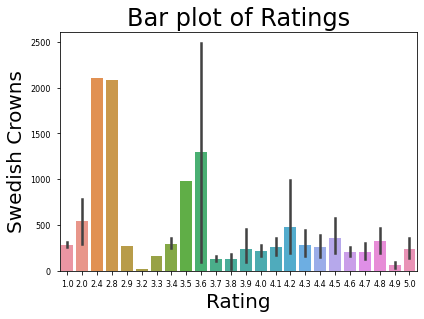

In [32]:
plt.style.use("seaborn-paper")
sns.barplot(data = bestsellers, x = "Rating", y = "Price (kr)")
plt.title("Bar plot of Ratings", fontsize = 24)

plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Swedish Crowns", fontsize = 20)

Text(0, 0.5, 'Frequency Count')

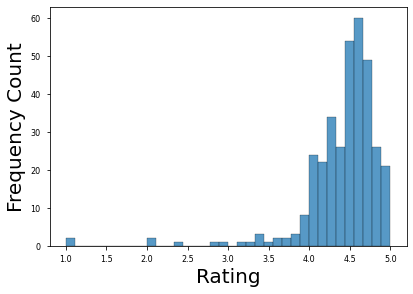

In [33]:
# Histogram Rating

sns.histplot(data = bestsellers, x = "Rating")
plt.style.use("seaborn-paper")
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Frequency Count", fontsize = 20)


Text(0, 0.5, 'Frequency Count')

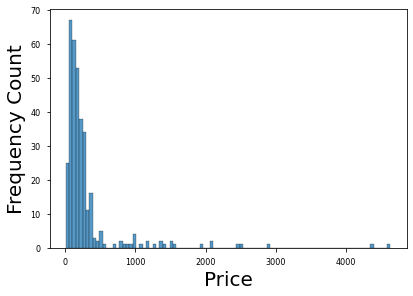

In [38]:
sns.histplot(data = bestsellers, x = "Price (kr)")
plt.style.use("seaborn-paper")
plt.xlabel("Price", fontsize = 20)
plt.ylabel("Frequency Count", fontsize = 20)

Text(0, 0.5, 'Frequency Count')

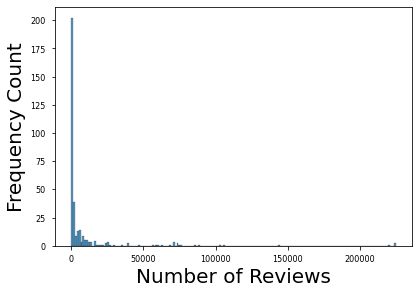

In [47]:
sns.histplot(data = bestsellers, x = "Number of Reviews")
plt.xlabel("Number of Reviews", fontsize = 20)
plt.ylabel("Frequency Count", fontsize = 20)

<AxesSubplot:xlabel='Category', ylabel='count'>

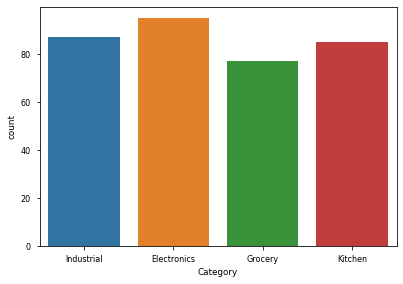

In [28]:
sns.countplot(data = bestsellers, x = "Category")

In [44]:
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            344 non-null    int64  
 1   Name               344 non-null    object 
 2   Category           344 non-null    object 
 3   Price (kr)         344 non-null    float64
 4   Rating             344 non-null    float64
 5   Number of Reviews  344 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 26.9+ KB


In [48]:
## Correlation table
corr_tot = bestsellers.corr()
corr_cat = bestsellers.groupby("Category").corr()

Text(0.5, 1.0, 'Table of Correlations')

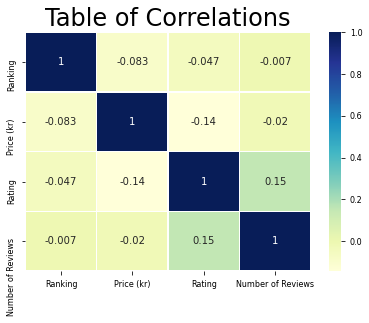

In [49]:
sns.heatmap(corr_tot, annot=True, linewidths=.5, cmap="YlGnBu")
plt.style.use("seaborn-paper")
plt.title("Table of Correlations", fontsize = 24)



Text(0.5, 1.0, 'Table of Correlations')

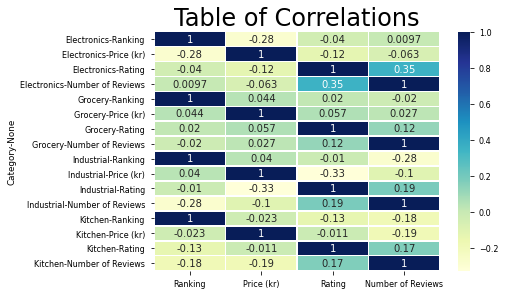

In [50]:
sns.heatmap(corr_cat, annot=True, linewidths=.5, cmap="YlGnBu")
plt.style.use("seaborn-paper")
plt.title("Table of Correlations", fontsize = 24)



In [302]:
bestsellers.groupby("Category").mean()

,Ranking,Price (kr),Rating,Number of Reviews
Category,,,,
Electronics,52.063158,352.050947,4.463158,26248.294737
Grocery,49.376623,183.349221,4.450649,1529.285714
Industrial,50.000000,316.200345,4.363218,1301.160920
Kitchen,51.811765,291.694000,4.403529,4390.376471


<AxesSubplot:xlabel='Category', ylabel='Number of Reviews'>

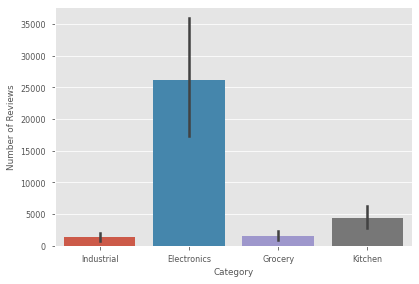

In [327]:
plt.style.use("seaborn-paper")
sns.barplot(data = bestsellers, x = "Category", y = "Number of Reviews")


In [234]:
bestsellers.describe()

,Ranking,Price (kr),Rating,Number of Reviews
count,368.000000,368.000000,368.000000,368.000000
mean,24.608696,337.452609,4.354348,3370.826087
std,14.559813,867.675816,0.296542,9937.162203
min,1.000000,61.640000,3.600000,1.000000
25%,12.000000,108.000000,4.200000,57.000000
50%,24.500000,142.915000,4.400000,264.000000
75%,36.000000,234.860000,4.600000,1390.000000
max,50.000000,5887.770000,4.800000,64015.000000


In [1]:
sns.displot(bestsellers, x="Number of Reviews", col="Category")

NameError: name 'sns' is not defined